In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [51]:
from datasets.carla import *
from tools.utils import *
from tools.loss import *

%matplotlib inline
import matplotlib.pyplot as plt

In [52]:
import seaborn as sns
sns.set_style('white')
sns.set_palette('muted')
sns.set_context(
    "notebook",
    font_scale=1.25,
    rc={"lines.linewidth": 2.5}
)

In [53]:
vac = torch.load('../test/vac/epistemic.pt').numpy()
reg = torch.load('../test/reg/epistemic.pt').numpy()
none = torch.load('../test/none/epistemic.pt').numpy()

ood = torch.load('../test/oods.pt').numpy()
label = torch.load('../test/reg/ground_truth.pt').numpy()

FileNotFoundError: [Errno 2] No such file or directory: '../test/vac/epistemic.pt'

In [14]:
vac_ood = vac[:, 0, :, :][ood.astype(np.bool_)]
vac_id = vac[:, 0, :, :][~ood.astype(np.bool_)]

reg_ood = reg[:, 0, :, :][ood.astype(np.bool_)]
reg_id = reg[:, 0, :, :][~ood.astype(np.bool_)]

none_ood = none[:, 0, :, :][ood.astype(np.bool_)]
none_id = none[:, 0, :, :][~ood.astype(np.bool_)]

Text(0.5, 0, 'Vacuity')

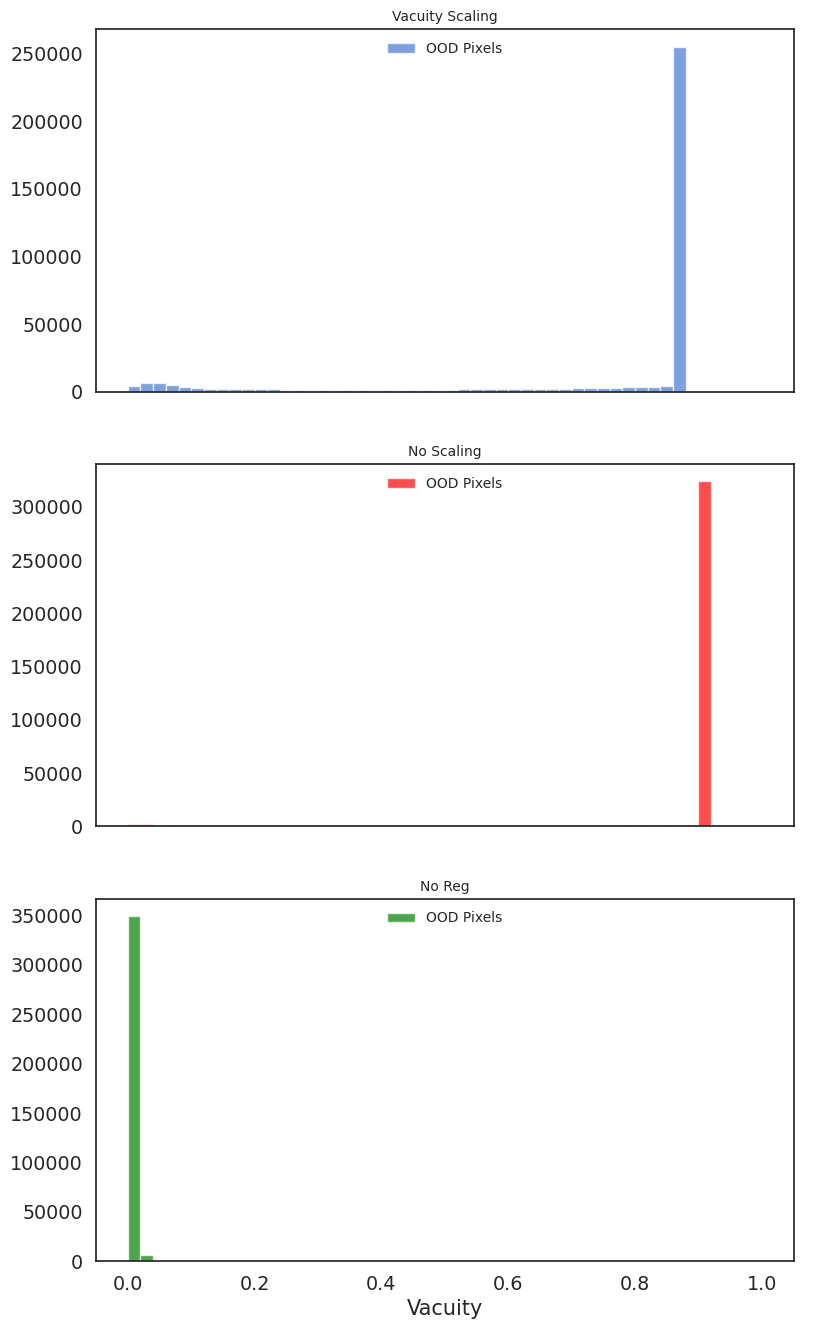

In [19]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(9, 16))

axs[0].hist(vac_ood.flatten(), bins=50, label="OOD Pixels", range=(0, 1), alpha=.7)
# axs[0].hist(na_id.flatten(), bins=200, label="ID Pixels", range=(0, 1), alpha=.7)
axs[0].set_title("Vacuity Scaling", fontsize=10)

axs[1].hist(reg_ood.flatten(), bins=50, label="OOD Pixels", range=(0, 1), alpha=.7, color='r')
# axs[1].hist(aug_id.flatten(), bins=200, label="ID Pixels", range=(0, 1), alpha=.7, color='r')
axs[1].set_title("No Scaling", fontsize=10)

axs[2].hist(none_ood.flatten(), bins=50, label="OOD Pixels", range=(0, 1), alpha=.7, color='g')
# axs[1].hist(aug_id.flatten(), bins=200, label="ID Pixels", range=(0, 1), alpha=.7, color='r')
axs[2].set_title("No Reg", fontsize=10)

for ax in axs.flatten():
    ax.grid(False)
    # ax.set_xlim(-0.005, .25)
    ax.legend(loc="upper center", frameon=False, ncol=2, fontsize=10)
    
    ax.yaxis.get_ticklocs(minor=True)
    ax.xaxis.get_ticklocs(minor=True)
    ax.minorticks_on()

a = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
a.set_xlabel("Vacuity")

Text(0.5, 0, 'Vacuity')

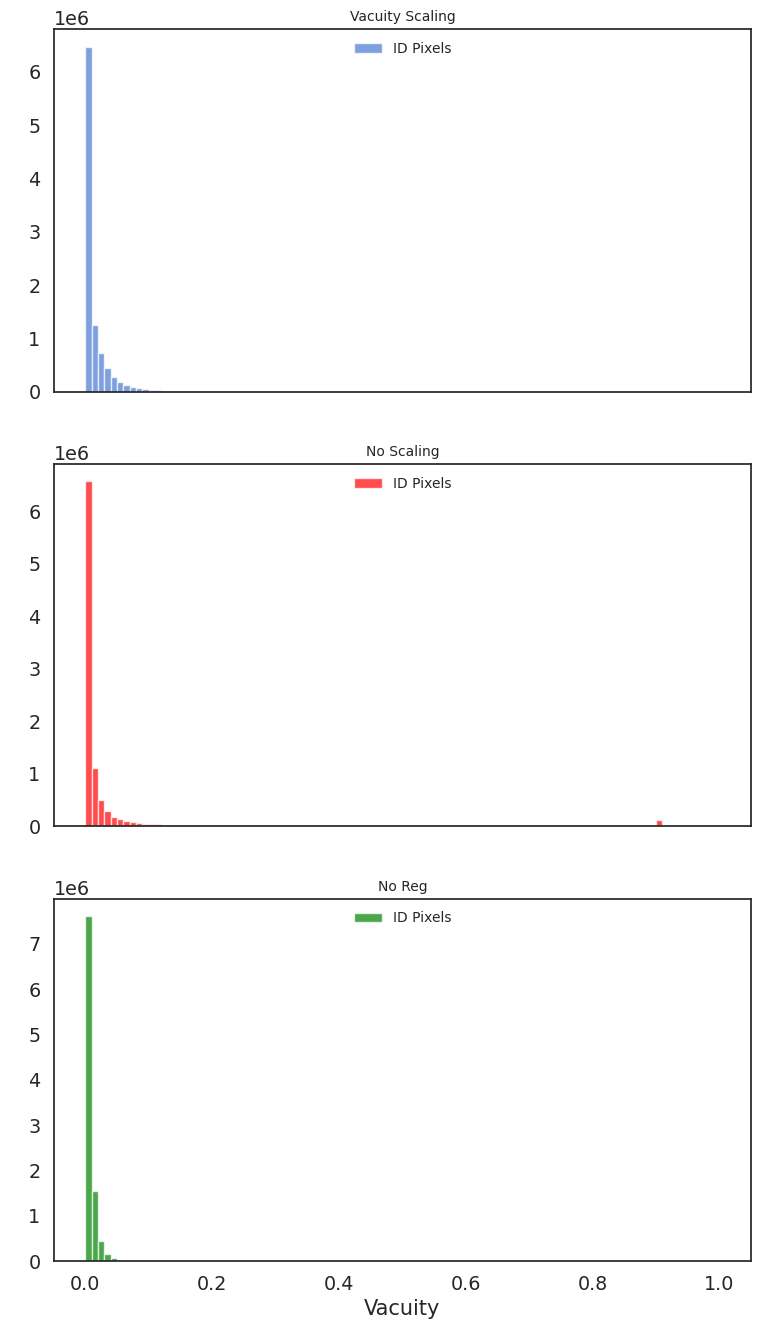

In [25]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(9, 16))

# axs[0].hist(vac_ood.flatten(), bins=50, label="OOD Pixels", range=(0, 1), alpha=.7)
axs[0].hist(vac_id.flatten(), bins=100, label="ID Pixels", range=(0, 1), alpha=.7)
axs[0].set_title("Vacuity Scaling", fontsize=10)

# axs[1].hist(reg_ood.flatten(), bins=50, label="OOD Pixels", range=(0, 1), alpha=.7, color='r')
axs[1].hist(reg_id.flatten(), bins=100, label="ID Pixels", range=(0, 1), alpha=.7, color='r')
axs[1].set_title("No Scaling", fontsize=10)

# axs[2].hist(none_ood.flatten(), bins=50, label="OOD Pixels", range=(0, 1), alpha=.7, color='g')
axs[2].hist(none_id.flatten(), bins=100, label="ID Pixels", range=(0, 1), alpha=.7, color='g')
axs[2].set_title("No Reg", fontsize=10)

for ax in axs.flatten():
    ax.grid(False)
    # ax.set_xlim(-0.005, .25)
    ax.legend(loc="upper center", frameon=False, ncol=2, fontsize=10)
    
    ax.yaxis.get_ticklocs(minor=True)
    ax.xaxis.get_ticklocs(minor=True)
    ax.minorticks_on()

a = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
a.set_xlabel("Vacuity")

(-0.5, 199.5, 199.5, -0.5)

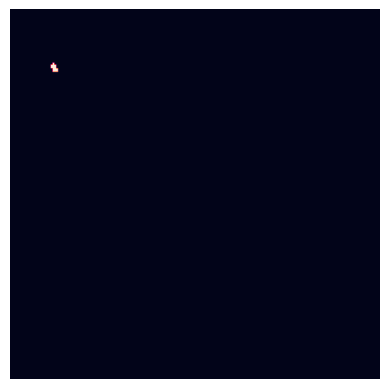

In [45]:
plt.imshow(ood[2])
plt.axis("off")

(-0.5, 199.5, 199.5, -0.5)

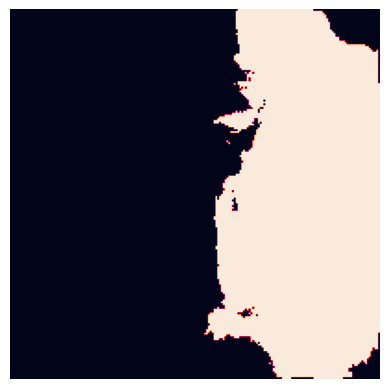

In [38]:
plt.imshow(vac[1, 0] > .5)
plt.axis("off")

(-0.5, 199.5, 199.5, -0.5)

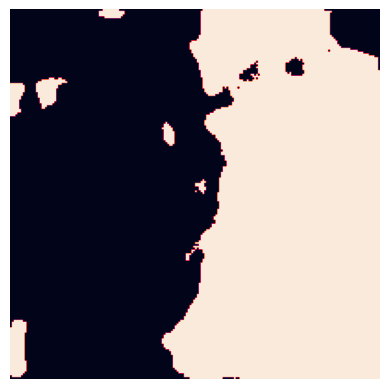

In [36]:
plt.imshow(reg[2, 0] > .5)
plt.axis("off")

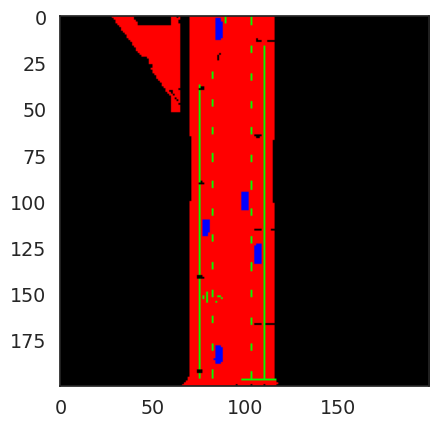

In [46]:
plt.imshow(map_rgb(torch.tensor(label[1])) / 255)